# Logistic Regression Using Python

<b>Google</b>: Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In a simple way, Logistic Regression is used for Binary Classification.
<br></br>
### Think in this way:
You are on the beach and you want to separate Red Shells and Blue Shells with a line and you draw a line as shown in the picture on the right side.
<br></br>

<img src="https://github.com/chandangadhavi11/LogisticfromScratch/blob/main/img1.png?raw=true" align="left"></img>





Now we have to teach the machine to draw a line that separates the data in the same manner.
<br>

For teaching Machine to draw a line following formulas will be used:

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

### 1. Import Essential Libraries

We will be using some libraries like 

- <a href="https://pandas.pydata.org/pandas-docs/stable/"><b>Pandas</b></a>: For managing the data
<br></br>
- <a href="https://docs.scipy.org/"><b>Numpy</b></a>: For data manipulate 
<br></br>
- <a href="https://matplotlib.org/"><b>Matplotlib</b></a>: For visualizing the data
<br></br>
- <a href="https://scikit-learn.org/stable/"><b>Sklearn</b></a>: Machine learning library

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 2. Take a look on dataset
With Pandas, we can load our data and see our data in a simple table in the proper way. We should look at our data table to see the values that we'll be working with. We can use the head and describe function to look at some sample data and statistics. We can also look at its keys and column names.

In [7]:
data = pd.read_csv('data.csv', header=None)
features = np.array(data[[0,1]])
targets = np.array(data[2])
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


We will be using the following functions to scatter points and to view red and blue regions.

<b>Note</b>: This following functions will only work when the data is in two dimension

In [8]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    
def display(m, b, color='g--'):
    plt.xlim(-0.1, 1.05)
    plt.ylim(-0.1, 1.05)

    x = np.arange(-100, 100)
    l1 = (m*x)+b
    l2 = l1*0 + min(l1)
    l3 = l1*0 + max(l1)
    plt.plot(x, l1, "k")
    plt.fill_between(x, l1,l2, alpha=0.25, color="red")
    plt.fill_between(x, l1,l3, alpha=0.25, color="blue")
    plt.grid(True)

### 3. Visualizing Data

It is essential to understand and visualize any data we will use in a machine learning model. By visualizing, we can see the trends and general associations of variables.

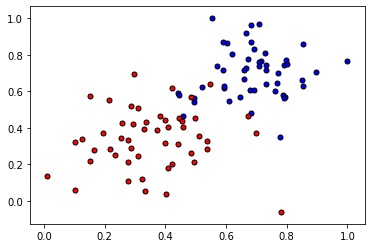

In [9]:
plot_points(features,targets)

### 4. Taking random weights and bias

This project is also a gradient descent algorithm so that needs to have random weights and bias. Our Logistic Regression algorithm will change weights and bias to come towards a more accurate solution and reduce error as minimum as possible.

In [10]:
np.random.seed(11) # after this code the random number will not change again and again
n_records, n_features = features.shape # Knowing the shape of the data for generating weights according to that
weights = np.random.normal(scale=1 / n_features**.5, size=n_features) # Random weights
bias = np.random.rand()# Random bias
print("Random weights :", weights, "\nRandom Bias :", bias)

Random weights : [ 1.23705131 -0.20228416] 
Random Bias : 0.42020360458772743


### 5. Splitting data into training data and testing data
It is necessary to ensure that our model is doing great if the model sees some random and unseen data. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.4, random_state = 11)

### 6. Training function
This is the main algorithm for Logistic regression. This algorithm will help us iterate through all the data, for a number of epochs. Feel free to play with epochs and learnrate

In [12]:
epochs = 500 # No. of iterations
learnrate = 0.1 # leraning rate of the model
last_loss = None # For knowing loss at previous epoch
errors = np.array([]) # Calculating Errors with every epoch
for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(X_train, y_train):
        output = 1 / (1 + np.exp(-(np.dot(x, weights) + bias))) # Sigmoid activation function
        d_error = (y - output) # This is y - y(hat)
        weights += learnrate * d_error * x # updating weights 
        bias += learnrate * d_error # updating bias 
    out = 1 / (1 + np.exp(-(np.dot(X_train, weights) + bias)))
    loss = np.mean( -y_train*np.log(out) - (1 - y_train) * np.log(1-out)) # Error function
    errors =  np.append(loss,errors)
    
    # This following code will show Accuracy and Train loss of the model at certain epochs
    if e % (epochs/10) == 0:
        print(f"\n<========== Epoch {e} ==========>")
        prediction = np.array([int(round(i)) for i in out])
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        print("Accuracy :", np.mean(prediction==y_train))
        last_loss = loss
        print("================================")


<========== Epoch 0 ==========>
Train loss:  0.6511420845262107
Accuracy : 0.6666666666666666

<========== Epoch 50 ==========>
Train loss:  0.17451151885911315
Accuracy : 0.9666666666666667

<========== Epoch 100 ==========>
Train loss:  0.13725555934024491
Accuracy : 0.9666666666666667

<========== Epoch 150 ==========>
Train loss:  0.12337566106174234
Accuracy : 0.95

<========== Epoch 200 ==========>
Train loss:  0.11620464746400153
Accuracy : 0.95

<========== Epoch 250 ==========>
Train loss:  0.11188211610801059
Accuracy : 0.95

<========== Epoch 300 ==========>
Train loss:  0.10902739640952279
Accuracy : 0.95

<========== Epoch 350 ==========>
Train loss:  0.10702384365278633
Accuracy : 0.95

<========== Epoch 400 ==========>
Train loss:  0.10555511924375101
Accuracy : 0.95

<========== Epoch 450 ==========>
Train loss:  0.10444264729032696
Accuracy : 0.95


### 7. Time to see model with testing data

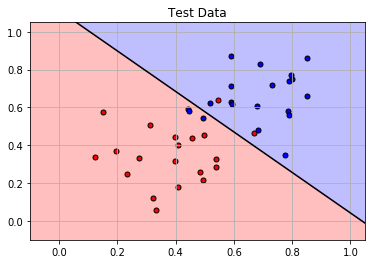

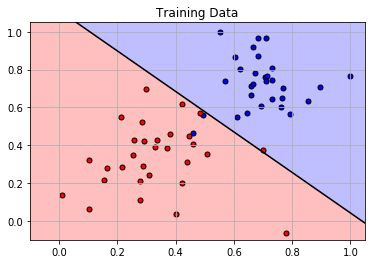

In [13]:
display(weights[0] / -weights[1], bias / -weights[1])
plt.title("Test Data")
plot_points(X_test,y_test)
plt.show()


display(weights[0] / -weights[1], bias / -weights[1])
plt.title("Training Data")
plot_points(X_train,y_train)

plt.show()

### 8. Error Plot
As the epochs will increase, the error will decrease gradually.

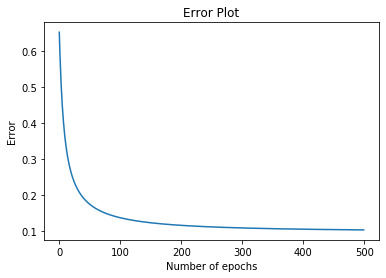

In [14]:
errors = errors[::-1]
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()

#### Prediction Function

In [15]:
def predict(X_test):
    out = 1 / (1 + np.exp(-(np.dot(X_test, weights) + bias)))
    prediction = [int(round(i)) for i in out]
    return prediction

#### Accuracy of the model with training data

In [16]:
print("Accuracy of the model :", np.mean(predict(X_test)==y_test))

Accuracy of the model : 0.875


## Checking the accuracy of the model using sklearn libraries

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

### Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Accuracy of Logistic Regression by sklearn:", accuracy_score(model.predict(X_test),y_test))

Accuracy of Logistic Regression by sklearn: 0.875


### Perceptron

In [19]:
model = Perceptron()
model.fit(X_train, y_train)
print("Accuracy of Perceptron by sklearn:", accuracy_score(model.predict(X_test),y_test))

Accuracy of Perceptron by sklearn: 0.875
